<a href="https://colab.research.google.com/github/rohan-dot/Analysing-Hotel-Booking-Dataset/blob/main/Rohan_Datta_Purkayastha_Team_6_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# 1. **How many booking were cancelled**
# 2. What is the percentage of booking for each year?
# 3. What are the weekend vs weekday bookings for resort hotels?
# 4. From which country most guest are coming
# 5. Which month has the least traffic?
# 6. Most booked accomodation type
# 7. Check the distribution of adr 
# **8. How much do guests pay for a room per night?**
# 9.How does the price per night vary over the year?
# 10 How long do people stay at the hotels
# 11. Bookings by market segment
# 12. Which month have the highest number of cancelations?
# 13. Effect of lead time on cancelation
# 14. Effect of deposit type on cancelation
# 15. Effect of ADR on cancelation ?
# 16. Which category has the highest average number of special request ?
# 17. Does parking have a relation with cancellation for resorts? 






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir = '/content/drive/My Drive/Alma Submission/AlmaBetter/Cohort Aravali/Module 2/Week 1/hotel_bookings.csv'

In [4]:
df = pd.read_csv(working_dir)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.shape

(119390, 32)

In [10]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [12]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [13]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
df['company'].isnull().sum()

112593

In [16]:
df[df['is_canceled']==1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [17]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [18]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [19]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
NIC        1
LCA        1
DJI        1
CYM        1
Name: country, Length: 177, dtype: int64

In [20]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

## Before starting any analysis with the dataset, we need to check whether there are any null values in the dataset.

In [21]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

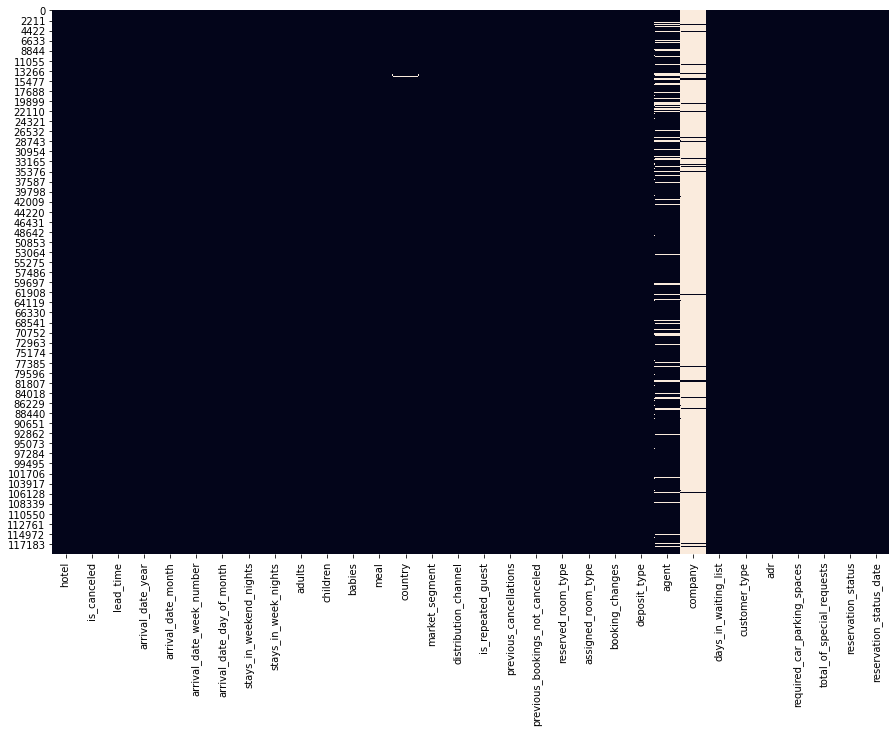

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)

## Conclusion:

# 1. Four columns which contain null values are Country, agent, company and children

# 2. 96% of Company column is filled with null values.





In [23]:
# First create a copy of original dataset, so that original dataset remains untouched
hotel_df = df.copy()

# In Agent and Company columns, "NULL" is presented as one of the category. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

In [24]:

## If no id of agent or company is null, just replace it with 0
hotel_df[['agent','company']] = hotel_df[['agent','company']].fillna(0.0)

# Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

# NULL values from country column is replaced with mode of country column

In [25]:
## For the missing values in the country column, replace it with mode (value that appears most often)
hotel_df['country'].fillna(df.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
hotel_df['children'].fillna(round(df.children.mean()), inplace=True)

# There are many rows that have zero guests including adults, children and babies. These type of rows does not make any sense and needs to be remove

In [26]:
hotel_df[hotel_df.adults + hotel_df.children + hotel_df.babies == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


In [27]:

## Drop Rows where there is no adult, baby and child
hotel_df = hotel_df.drop(df[(hotel_df.adults + hotel_df.babies + hotel_df.children)==0].index)

In [28]:
hotel_df.shape

(119210, 32)

## 1. How many booking were cancelled ?

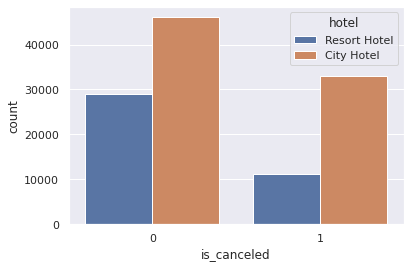

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=hotel_df)

## 2. What is the percentage of booking for each year?

In [30]:
hotel_df['arrival_date_year'].value_counts()

2016    56623
2017    40620
2015    21967
Name: arrival_date_year, dtype: int64

In [31]:
len(hotel_df['arrival_date_year'])

119210

In [32]:
56623/119210

0.474985320023488

In [33]:
sns.set(color_codes=True)


year_percent_df = (hotel_df['arrival_date_year'].value_counts(normalize=True).mul(100).reset_index()).rename(columns ={'index':'Year','arrival_date_year':'percentage_of_booking'})
year_percent_df

,Year,percentage_of_booking
0,2016,47.498532
1,2017,34.074323
2,2015,18.427145


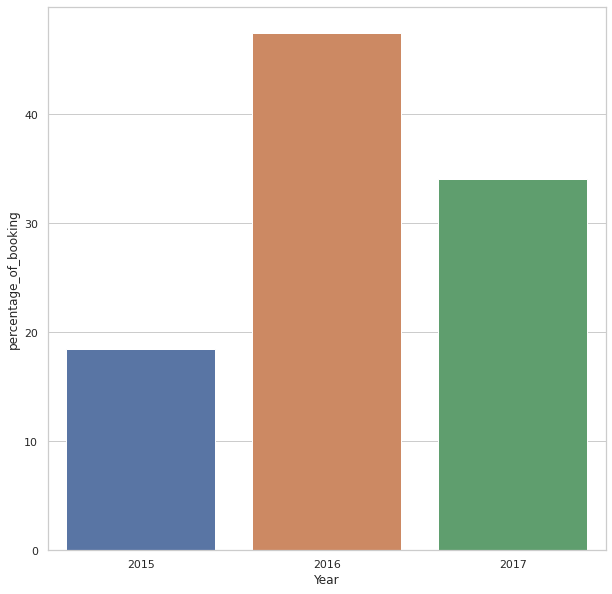

In [122]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Year", y="percentage_of_booking", data=year_percent_df)

# 3. What are the weekend vs weekday bookings for resort hotels?

In [120]:
week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [121]:
weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights for Resort type hotel')

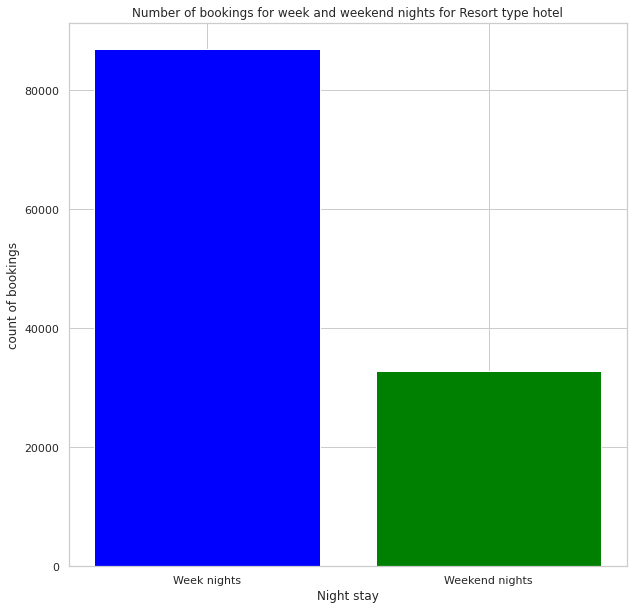

In [119]:
plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['blue','green'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')

# 4. From which country most guest are coming

In [37]:
hotel_df[hotel_df['country']=='PRT']['hotel'].value_counts()

City Hotel      30861
Resort Hotel    17622
Name: hotel, dtype: int64

In [38]:
top_10_countries = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]

In [39]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [40]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,20977,33.993421
1,GBR,9668,15.667083
2,FRA,8468,13.722472
3,ESP,6383,10.343710
4,DEU,6067,9.831629
5,IRL,2542,4.119334
6,ITA,2428,3.934596
7,BEL,1868,3.027111
8,NLD,1716,2.780794
9,USA,1592,2.579851


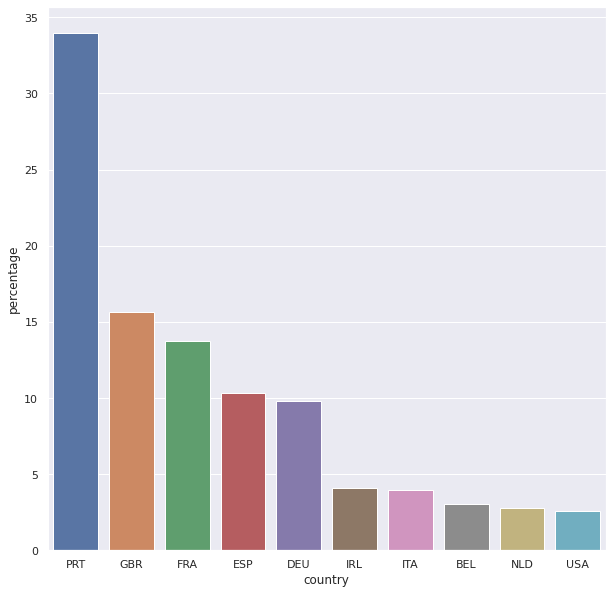

In [41]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

## 5. Which month has the least traffic?

In [42]:
month_df = hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})

In [43]:
month_df

,month,number_of_bookings
0,August,8624
1,July,7907
2,May,7103
3,October,6901
4,March,6620
5,April,6560
6,June,6395
7,September,6385
8,February,5359
9,November,4651


In [44]:
month_df_hotel_type = hotel_df[hotel_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()

In [45]:
month_df_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4010,2550
August,5367,3257
December,2377,2014
February,3051,2308
January,2249,1866
July,4770,3137
June,4358,2037
March,4049,2571
May,4568,2535


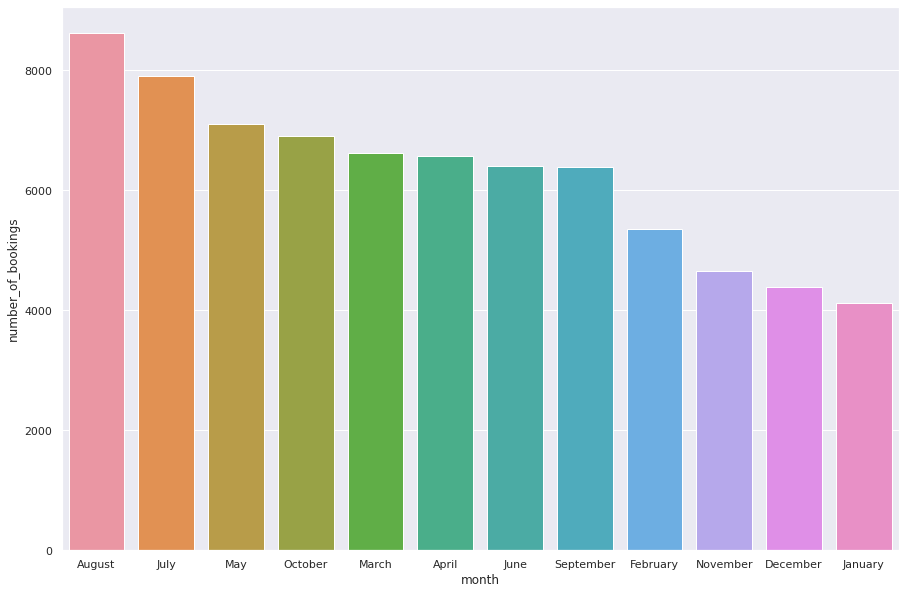

In [46]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

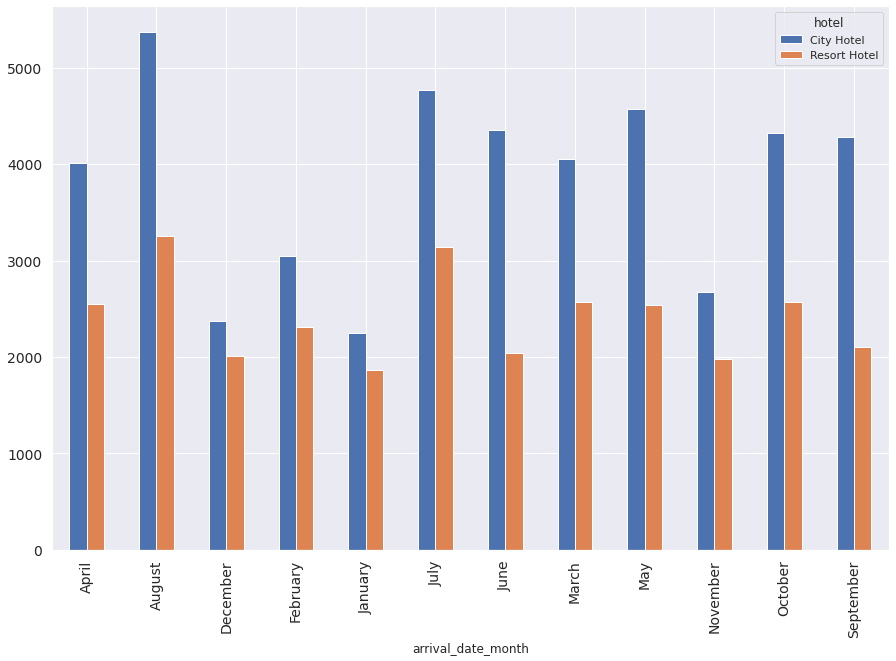

In [47]:
ax = month_df_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

## 6. Most booked accomodation type

## **For this question, we are checking if the booking was made for an individual or a couple(A couple in our consideration is a group of 2 adults) or a family(containing people more than 2)**

In [48]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
individual = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==1) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
couple = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==2) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
family = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults'] )+ (hotel_df['children']) + (hotel_df['babies'] ) > 2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
total_count = hotel_df[(hotel_df['is_canceled']==0)].shape[0]

In [51]:
len(couple)

49136

In [52]:
total_count

75011

In [53]:
percentage = [round(len(item)/total_count * 100) for item in [individual,couple,family]]

In [54]:
percentage

[21, 66, 13]

In [55]:
types_of_accomodation = ['Individual','Couple','Family']

In [56]:
dict(zip(types_of_accomodation,percentage))

{'Couple': 66, 'Family': 13, 'Individual': 21}

In [57]:
data = pd.DataFrame({'types_of_accomodation':types_of_accomodation,'percentage':percentage})

In [58]:
data

,types_of_accomodation,percentage
0,Individual,21
1,Couple,66
2,Family,13


In [59]:
family.groupby('arrival_date_month').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807
August,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102
December,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534
February,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628
January,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331
July,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844
June,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737
March,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607
May,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614


In [60]:
individual.groupby('arrival_date_month').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
August,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817
December,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974
February,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
January,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
July,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841
June,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196
March,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
May,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522


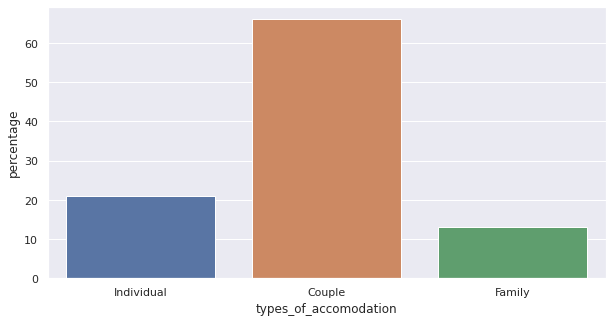

In [61]:
plt.figure(figsize=(10,5))                                                             # groupby on basis of type of hotels
ax = sns.barplot(x="types_of_accomodation", y="percentage", data = data)

## 7. Check the distribution of adr

In [62]:

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
not_canceled_data = hotel_df[hotel_df['is_canceled']==0]

In [64]:
not_canceled_data[not_canceled_data['adr'] == 0][not_canceled_data['market_segment']=='Complementary'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


# The adr column consist of values which are euqal to 0. However, there are few rows where we see the market segment as Complementary for all those values and it makes sense. Other than those all other values seems as an anamoly and needs to be removed

In [65]:
hotel_df= hotel_df.drop(hotel_df[(hotel_df['adr'] == 0) & (hotel_df['market_segment'] != 'Complementary')].index)

In [66]:
hotel_df[hotel_df['adr']==0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


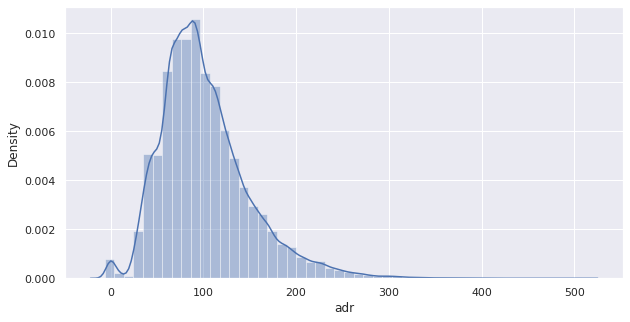

In [67]:
plt.figure(figsize=(10,5))
ax = sns.distplot(hotel_df[hotel_df['is_canceled']==0]['adr'])

In [68]:
hotel_df[hotel_df['is_canceled']==0]['adr'].median()

93.75

In [69]:
hotel_df[hotel_df['is_canceled']==0]['adr'].mode()

0    65.0
dtype: float64

In [70]:
hotel_df[hotel_df['is_canceled']==0]['adr'].mean()

101.5789206435013

## The above distribution plot is a right-skewed distribution, with an average adr of 100.57. Half of the adr values are less than 93.7 and the most repeated adr value is 65

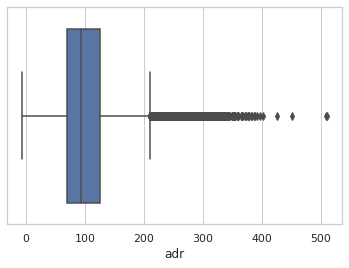

In [71]:
 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=hotel_df[hotel_df['is_canceled']==0]['adr'])

## 8. How much do guests pay for a room per night?

In [72]:
hotel_guest_df = not_canceled_data[not_canceled_data['adr']!=0][['hotel','adults','children','assigned_room_type','arrival_date_month','arrival_date_year','adr']]

In [73]:
hotel_guest_df['adr_per_person'] = hotel_guest_df['adr']/(hotel_guest_df['adults'] + hotel_guest_df['children'])

In [74]:
hotel_guest_df.head()

,hotel,adults,children,assigned_room_type,arrival_date_month,arrival_date_year,adr,adr_per_person
2,Resort Hotel,1,0.0,C,July,2015,75.0,75.0
3,Resort Hotel,1,0.0,A,July,2015,75.0,75.0
4,Resort Hotel,2,0.0,A,July,2015,98.0,49.0
5,Resort Hotel,2,0.0,A,July,2015,98.0,49.0
6,Resort Hotel,2,0.0,C,July,2015,107.0,53.5


# The number of guest coming in the month of August is high and are assumptions despite bookings being high the average value of adr per person 

(0.0, 160.0)

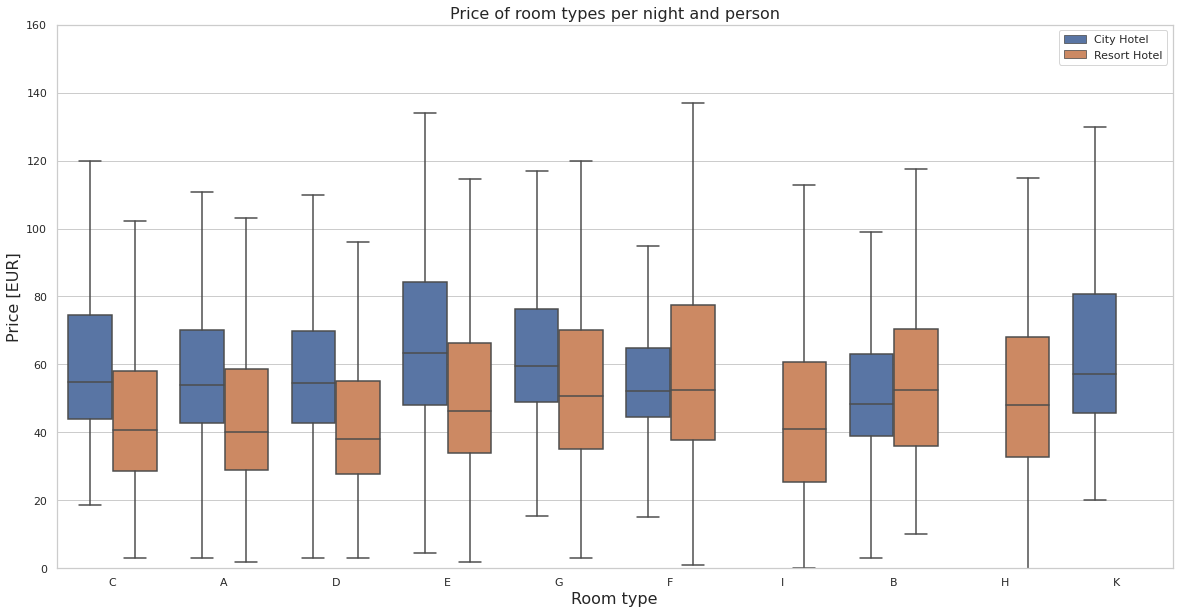

In [75]:
plt.figure(figsize=(20,10))
sns.boxplot(x="assigned_room_type",
            y="adr_per_person",
            hue="hotel",
            data=hotel_guest_df, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)

In [76]:
hotel_guest_df.groupby(['hotel','assigned_room_type'])['adr_per_person'].mean().unstack()

assigned_room_type,A,B,C,D,E,F,G,H,I,K
hotel,,,,,,,,,,
City Hotel,60.161993,56.121718,64.027424,59.947508,71.936045,60.280625,70.180796,NaN,NaN,66.498713
Resort Hotel,46.823052,57.851989,46.117440,45.208490,53.811438,60.634492,56.359808,51.963793,45.678871,NaN


# 9.How does the price per night vary over the year?

In [77]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
hotel_guest_df["arrival_date_month"] = pd.Categorical(hotel_guest_df["arrival_date_month"], categories=ordered_months, ordered=True)

In [78]:
avg_adr = hotel_guest_df.groupby(['arrival_date_month','hotel'])['adr_per_person'].mean().unstack()
avg_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,52.565578,32.115826
February,52.042529,31.555989
March,53.320455,34.846134
April,59.531546,44.725812
May,71.442346,43.296176
June,67.340285,57.360025
July,58.322598,71.516237
August,58.879670,84.463704
September,68.694085,50.979062


In [79]:
len(not_canceled_data[not_canceled_data['arrival_date_month']=='August'])

8624

In [80]:
hotel_guest_df[(hotel_guest_df['arrival_date_month']=='August') & (hotel_guest_df['hotel'] == 'City Hotel') ]['adr_per_person'].mean()

58.87966964172657

In [81]:
hotel_guest_df[(hotel_guest_df['arrival_date_month']=='August') & (hotel_guest_df['hotel'] == 'Resort Hotel') ]['adr_per_person'].mean()

84.46370437804723

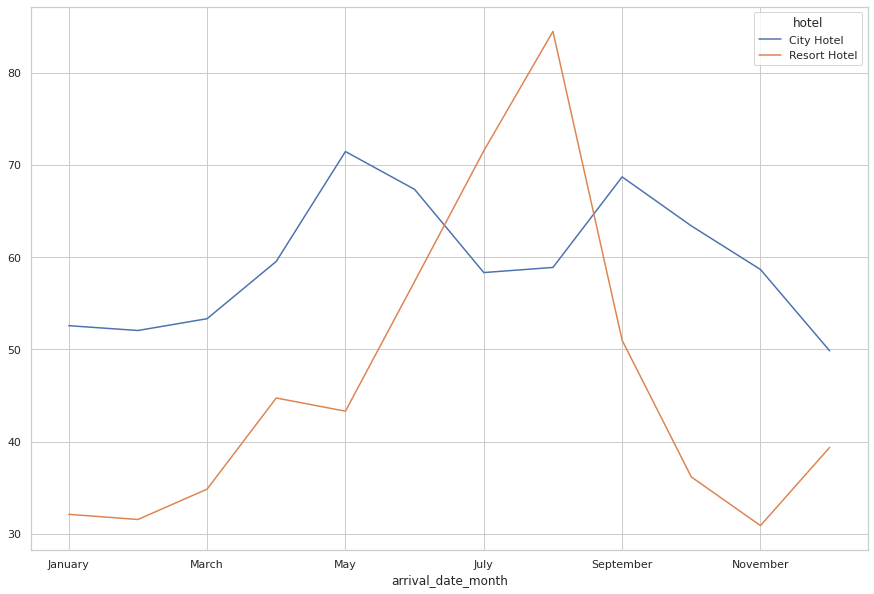

In [82]:

avg_adr.plot.line(figsize=(15,10))

# 10 How long do people stay at the hotels

In [83]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [84]:
not_canceled_data['total_nights_stay'] = not_canceled_data['stays_in_weekend_nights'] + not_canceled_data['stays_in_week_nights']

In [85]:
not_canceled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [86]:
not_canceled_data[not_canceled_data['total_nights_stay'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [87]:
# Grouping on the basis of Total nights stay
percentage = not_canceled_data.groupby('total_nights_stay')["hotel"].value_counts(normalize = True).mul(100).unstack()

In [88]:
percentage.fillna(0)

hotel,City Hotel,Resort Hotel
total_nights_stay,,
0,40.353698,59.646302
1,58.186094,41.813906
2,70.990886,29.009114
3,75.644207,24.355793
4,69.850204,30.149796
5,62.830299,37.169701
6,47.970639,52.029361
7,21.922874,78.077126
8,28.711485,71.288515


(0.0, 23.0)

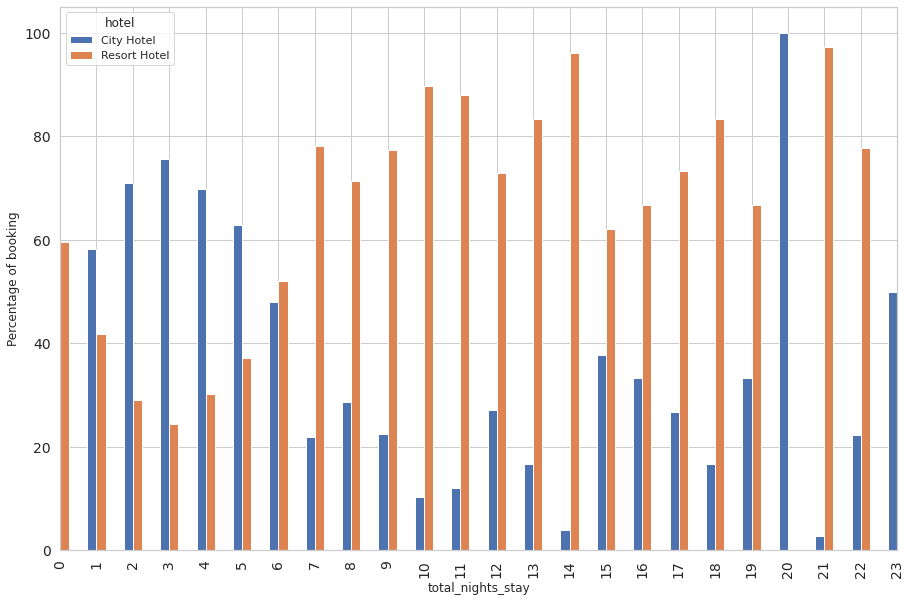

In [89]:

ax = percentage.plot.bar(figsize = (15,10),fontsize = 14)
ax.set_ylabel('Percentage of booking')
ax.set_xlim(0,23)

# 11. Bookings by market segment

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


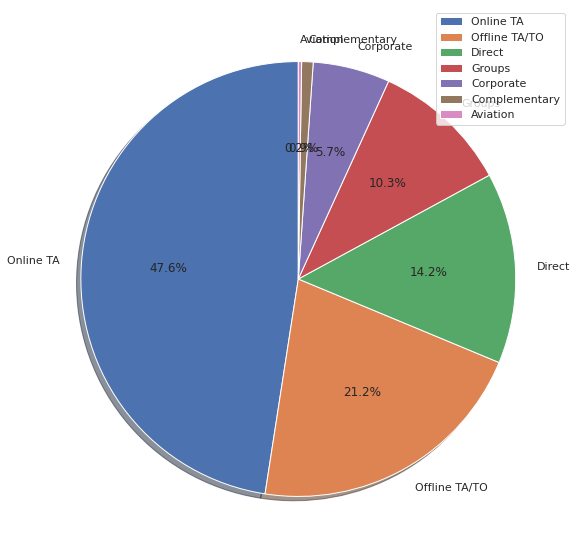

In [90]:
# total bookings per market segment (incl. canceled)
plt.figure(figsize = (20,10))
segments=not_canceled_data["market_segment"].value_counts()

# pie plot

ax = plt.pie(segments,
             labels=segments.index,
             autopct='%1.1f%%',
             shadow=True, startangle=90
             )

plt.legend(ax, labels = segments.index, loc="best")


# 12. Which month have the highest number of cancelations?

In [91]:
hotel_df[hotel_df['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       5231
July         4728
May          4670
June         4529
April        4512
October      4224
September    4094
March        3143
February     2682
December     2362
November     2119
January      1801
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'number_of_cancelation')

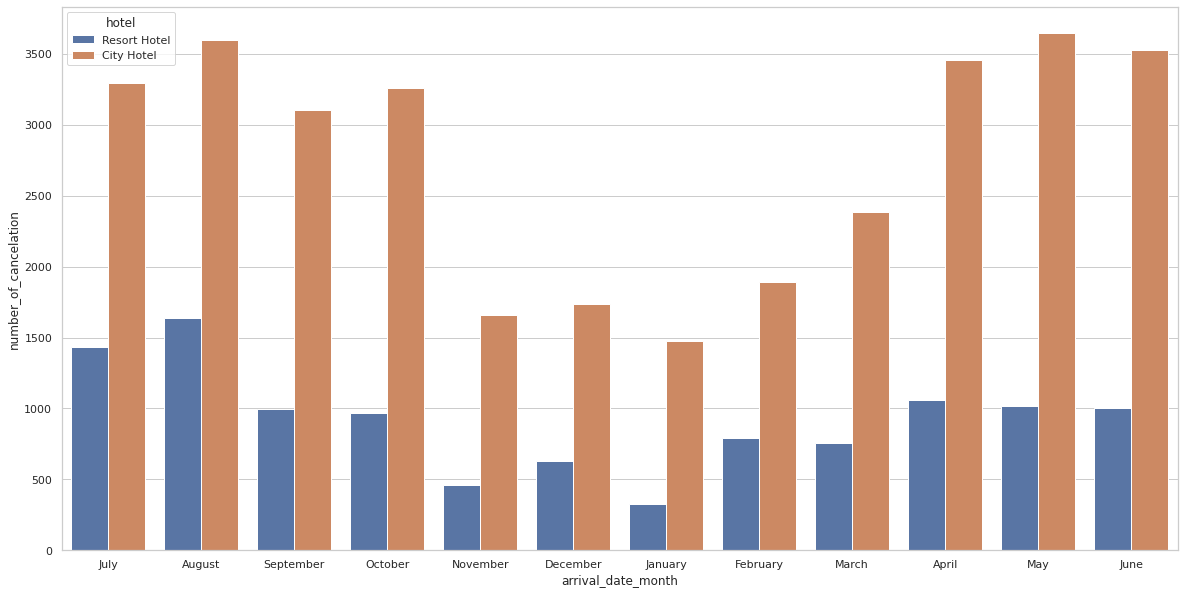

In [92]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = hotel_df[hotel_df['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')

# 13. Effect of lead time on cancelation

Text(0, 0.5, 'Cancelations [%]')

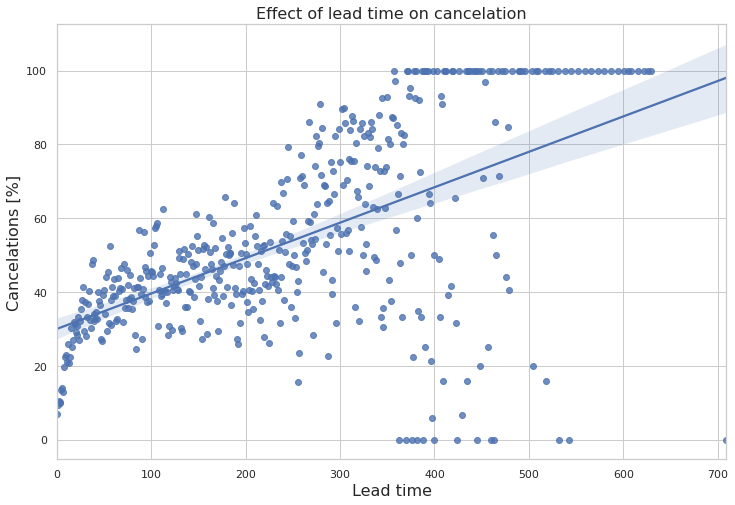

In [93]:
lead_time_df = hotel_df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)



In [94]:
lead_time_df

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,5958.0,0.068144,0.252013,0.0,0.0,0.0,0.0,1.0
1,3361.0,0.093722,0.291485,0.0,0.0,0.0,0.0,1.0
2,2028.0,0.104043,0.305392,0.0,0.0,0.0,0.0,1.0
3,1791.0,0.099944,0.300009,0.0,0.0,0.0,0.0,1.0
4,1685.0,0.102077,0.302840,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
615,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# 14. Effect of deposit type on cancelation

Text(0, 0.5, 'Cancelations [%]')

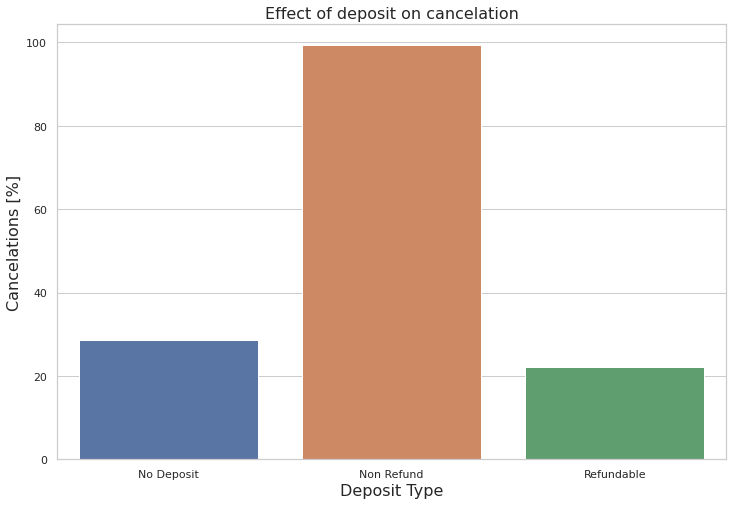

In [95]:
deposit_df = hotel_df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)


In [96]:
deposit_df

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,103316.0,0.286161,0.451968,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


# 15. Effect of ADR on cancelation

(0.0, 100.0)

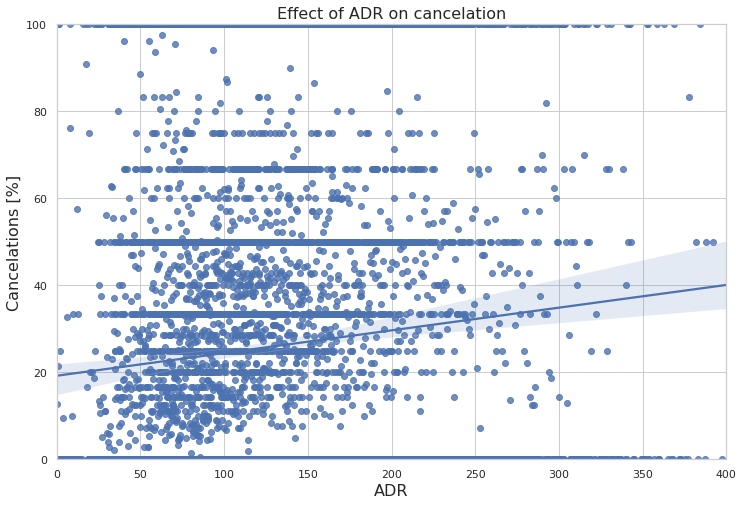

In [97]:
adr_cancel_data = hotel_df.groupby("adr")["is_canceled"].describe()
#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)

In [98]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [106]:
week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [107]:
weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights')

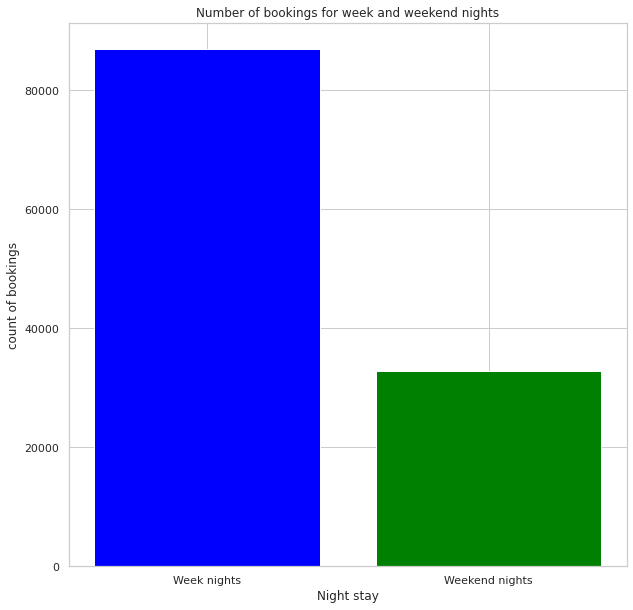

In [118]:
plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['blue','green'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')